# $Assignment$ $11$

## $Joshi$ $Aditi$ - $200121022$

## $Integration$ $Using$ $Random$ $Numbers$

## $Using$ $Random$ $Numbers$ $To$ $Estimate$ $The$ $Value$ $Of$ $Pi$

## Manual Generation of Random Numbers

### Generation of Pseudo Random Numbers using Linear Congruential Generation (LCG) Method

Random numbers can be generated using the formula below

$X_{i+1} = (aX_i + c)(mod m)$

where, a,c and m are predetermined. 

Here, $X_i$ is called the Random Seed. It is the Random Seed which makes this sequence of numbers random. 

This sequence of numbers can take maximum value $m - 1$. It is called Pseudo - Random because we are using a predetermined expression/formula for obtaining the values of further numbers in the sequence given the initial number. We can also observe that $X_{i+1}$ has dependency only through $X_i$, i.e. the value preceding it. It is independent of other random variables/uncorrelated to others. 

In [1]:
# importing libraries

import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# function for Linear Congruential Generator

def lcg(seed, a, c, m):
    lcg_random = np.zeros(m)
    
    lcg_random[0] = seed
    
    for i in range(m - 1):
        lcg_random[i + 1] = ((a * lcg_random[i] + c) % m)/float(m)
        
    return lcg_random    

In [3]:
# finding value of pi

def findpi(x0, y0, ax, ay, cx, cy, m):
    lcg_x = lcg(x0, ax, cx, m)
    lcg_y = lcg(y0, ay, cy, m)
    
    
    random_x = np.random.random([m])
    random_y = np.random.random([m])
    
    points_inside_lcg = 0
    points_inside_random = 0
    
    for i in range(m):
        if ((lcg_x[i])**2 + (lcg_y[i])**2) < 1.0:
            points_inside_lcg += 1
        if ((random_x[i])**2 + (random_y[i])**2) < 1.0:
            points_inside_random += 1
            
    pi_lcg = 4.00*(float(points_inside_lcg/m))
    pi_random = 4.00*(float(points_inside_random/m))
    
    return lcg_x, lcg_y, random_x, random_y, pi_lcg, pi_random

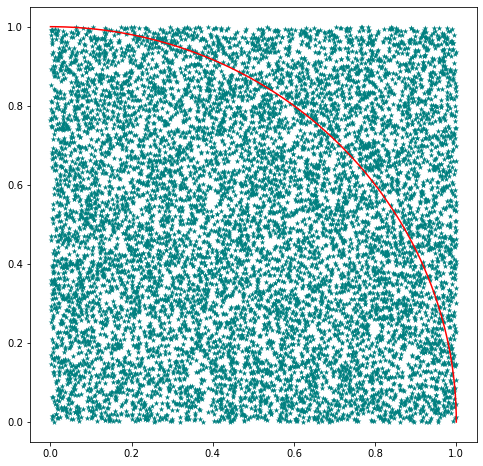

Value of pi obtained using random numbers generated by LCG is 3.146


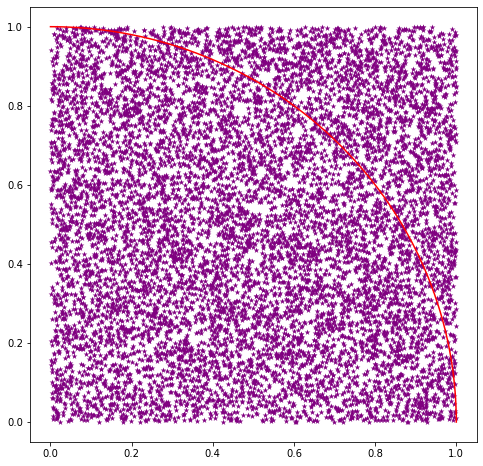

Value of pi obtained using random numbers generated by Python is 3.1252


In [7]:
x_lcg, y_lcg, x_random, y_random, lcg_pi, random_pi = findpi(0.375, 0.625, 1827943, 1529410, 1722335, 1473272, 10000)

phi = np.linspace(0, np.pi/2, 1000)
x = np.cos(phi)
y = np.sin(phi)

plt.figure(figsize=(8,8)) 
plt.plot(x, y, color = 'red')
plt.scatter(x_lcg, y_lcg, marker = '*', color = 'teal', linewidths = 0.001)
plt.show()
print("Value of pi obtained using random numbers generated by LCG is {}".format(lcg_pi))

plt.figure(figsize=(8,8))
plt.plot(x, y, color = 'red')
plt.scatter(x_random, y_random, marker = '*', color = 'purple', linewidths = 0.001)
plt.show()
print("Value of pi obtained using random numbers generated by Python is {}".format(random_pi))

Method 					 Steps 	 Value of pi

LCG 					 1000	 3.252

Python generated random numbers 	 1000 	 2.992

LCG 					 2000	 3.134

Python generated random numbers 	 2000 	 3.146

LCG 					 3000	 3.1

Python generated random numbers 	 3000 	 3.122667

LCG 					 4000	 3.149

Python generated random numbers 	 4000 	 3.125

LCG 					 5000	 3.1504

Python generated random numbers 	 5000 	 3.1288

LCG 					 6000	 3.132

Python generated random numbers 	 6000 	 3.11

LCG 					 7000	 3.156

Python generated random numbers 	 7000 	 3.101714

LCG 					 8000	 3.126

Python generated random numbers 	 8000 	 3.165

LCG 					 9000	 3.181778

Python generated random numbers 	 9000 	 3.103556

LCG 					 10000	 3.1316

Python generated random numbers 	 10000 	 3.1392

LCG 					 11000	 3.148

Python generated random numbers 	 11000 	 3.109818

LCG 					 12000	 3.181

Python generated random numbers 	 12000 	 3.144

LCG 					 13000	 3.136923

Python generated random numbers 	 13000 	 3.157231

LCG 					 140

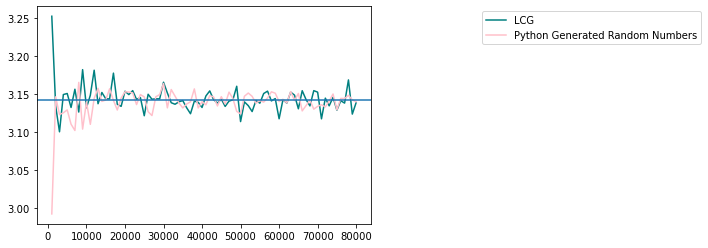

In [10]:
# as we increase the number of random numbers, 
# pi obtained using random numbers approaches the actual value of pi
# we plot a graph to demonstrate the above

print("Method \t\t\t\t\t Steps \t Value of pi\n")

random_using_lcg = []
random_using_python = []

for step in range(1000, 81000, 1000):
    xlcg, ylcg, xr, yr, pi_lcg, pi_random = findpi(0.45, 0.5, 1827943, 1529410, 1722335, 1473272, step)
    random_using_lcg.append(pi_lcg)
    random_using_python.append(pi_random)
    if step <= 200000:
        print("LCG \t\t\t\t\t {}\t {}\n".format(step, np.round(pi_lcg,6)))
        print("Python generated random numbers \t {} \t {}\n".format(step, np.round(pi_random,6)))
    

x = np.arange(1000, 81000, 1000)
plt.plot(x, random_using_lcg, label = "LCG", color = "teal")
plt.plot(x, random_using_python, label = "Python Generated Random Numbers", color = "pink")
plt.legend(bbox_to_anchor = (2,1))
plt.axhline(y =  np.pi)
plt.show()